In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## QSN 1
Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
#### BMI(body mass index) = weight / (height **2)

In [54]:
df['overWeight'] = df['weight'] / (df['height']**2)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overWeight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.002197
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.003493
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.002351
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.002871
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.002301


In [55]:
df.loc[df['overWeight'] >= 25]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overWeight


In [56]:
df['overWeight'] = df['overWeight'].apply(lambda x:1 if x>=25 else 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overWeight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


## QSN 2
Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [57]:
df['cholesterol'] = df['cholesterol'].apply(lambda x:1 if x>1 else 0)
df['gluc'] = df['gluc'].apply(lambda x:1 if x>1 else 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overWeight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


## QSN 3
Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

In [58]:
cardios = df['cardio'].unique()

In [59]:
cardio_dfs = []
for value in cardios:
    values = df[df['cardio'] == value]
    cardio_dfs.append(values)

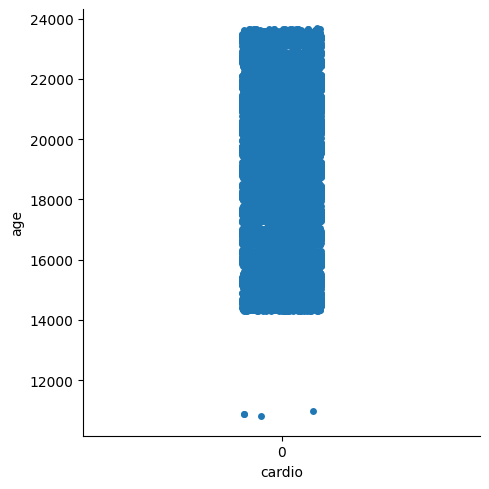

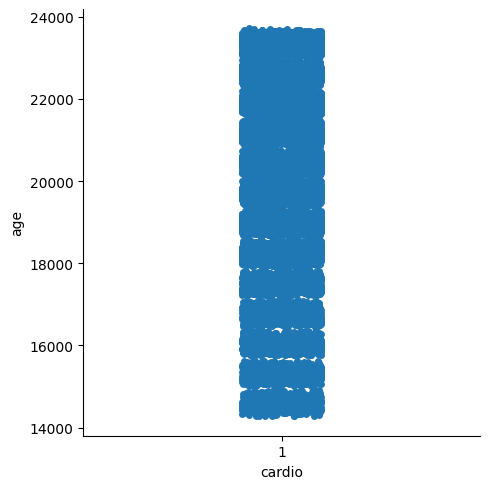

In [60]:
for cardio_df in cardio_dfs:
    sns.catplot(data = cardio_df, x='cardio', y='age')

## QSN 4
Clean the data. Filter out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

In [70]:
df_clean = df[df['ap_lo'] <= df['ap_hi']]

In [72]:
df_clean  = df['height'] >= df['height'].quantile(0.025)

In [73]:
df_clean = df['height'] < df['height'].quantile(0.975)

In [74]:
df_clean = df['height'] > df['height'].quantile(0.025)

In [76]:
df_clean = df['weight'] < df['weight'].quantile(0.975)

## QSN 5
Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [81]:
import numpy as np
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix))

<Axes: >

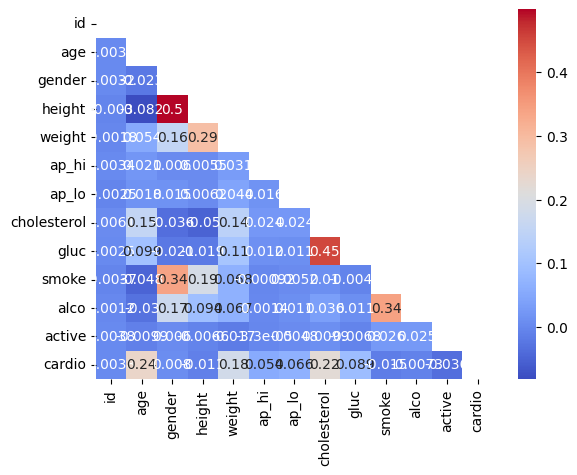

In [82]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=mask)